# 1.Problem Statement

The objective of this project is to predict customer churn based on historical service and demographic data. By identifying customers who are likely to leave, the business can take proactive measures to improve retention and reduce revenue loss.

In [436]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import CategoricalNB,BernoulliNB,GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,roc_auc_score,roc_curve

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.width',120)

### 2.Import data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 3. Exploratory Data Analysis

### 3.1 Categorical Data

##### 3.1.1 Total customers

In [6]:
df['customerID'].nunique()

7043

##### Total unique customers 7043. 

#### 3.1.2 gender

In [9]:
df['gender'].value_counts(dropna=False)

gender
Male      3555
Female    3488
Name: count, dtype: int64

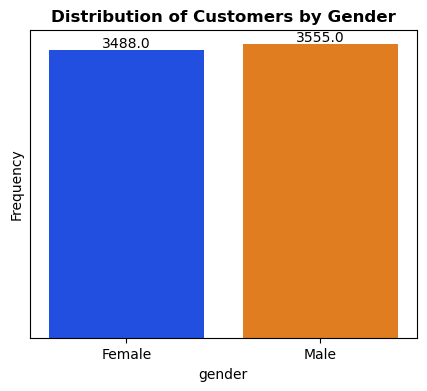

In [182]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x = 'gender',data=df,palette='bright')
for p in ax.patches:
    ax.annotate(
        str(p.get_height()),
        (p.get_x()+p.get_width()/2,p.get_height()),
        ha = 'center',va='bottom')
    
plt.title('Distribution of Customers by Gender',fontweight="bold")
plt.yticks([])
plt.ylabel('Frequency')
plt.show()

##### The customer's gender is almost similar; there is not much difference 

#### 3.1.3 SeniorCitizen 

In [26]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({1:'Yes',0:'No'})

In [28]:
df['SeniorCitizen'].value_counts(dropna=False)

SeniorCitizen
No     5901
Yes    1142
Name: count, dtype: int64

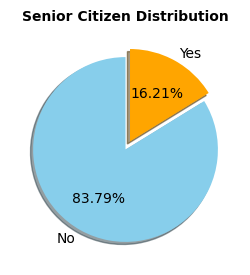

In [45]:
plt.figure(figsize=(3,3))
df_s = df['SeniorCitizen'].value_counts(normalize=True,dropna=False).reset_index()
plt.pie(df_s['proportion'],labels=df_s['SeniorCitizen'],autopct='%.2f%%',explode = [0.0,0.1],shadow=True,normalize=True,startangle=90,
    colors=['skyblue', 'orange'])
plt.title("Senior Citizen Distribution",size=10,pad=10,fontweight="bold")
plt.show()

#### 3.1.4 Partner 

In [54]:
df['Partner'].value_counts(dropna=False)

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [59]:
df_p = df['Partner'].value_counts(normalize=True).reset_index()
df_p

,Partner,proportion
0,No,0.516967
1,Yes,0.483033


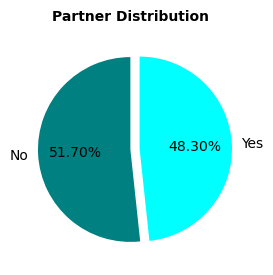

In [71]:
plt.figure(figsize=(3,3))
plt.pie(df_p['proportion'],labels=df_p['Partner'],autopct='%.2f%%',explode=[0,0.1],startangle=90,colors=['teal','aqua'])
plt.title("Partner Distribution",size=10,pad=10,fontweight="bold")
plt.show()

#### 3.1.5 Dependents

In [72]:
df['Dependents'].value_counts(dropna=False)

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

In [74]:
df['Dependents'].value_counts(normalize=True,dropna=False).reset_index()

,Dependents,proportion
0,No,0.700412
1,Yes,0.299588


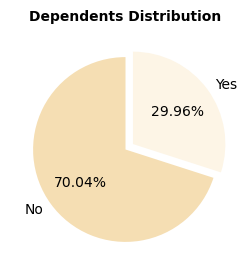

In [76]:
df_d = df['Dependents'].value_counts(normalize=True,dropna=False).reset_index()
plt.figure(figsize=(3,3))
plt.pie(df_d['proportion'],labels=df_d['Dependents'],autopct='%.2f%%',explode=[0.0,0.1],startangle=90,colors=['wheat','oldlace'])
plt.title('Dependents Distribution',size=10,pad=10,fontweight="bold")
plt.show()

#### 3.1.6 PhoneService

In [77]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

In [85]:
df_p = df['PhoneService'].value_counts(dropna=False,normalize=True).reset_index()
df_p['proportion']=df_p['proportion']*100
df_p

,PhoneService,proportion
0,Yes,90.316626
1,No,9.683374


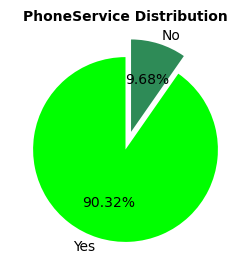

In [96]:
plt.figure(figsize=(3,3))
plt.pie(df_p['proportion'],labels=df_p['PhoneService'],autopct='%.2f%%',explode=[0.0,0.2],startangle=90,colors=['lime','seagreen'])
plt.title('PhoneService Distribution',size=10,pad=10,fontweight='bold')
plt.show()

#### 3.1.7 MultipleLines

In [98]:
df['MultipleLines'].value_counts(dropna=False)

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [99]:
df['MultipleLines'].value_counts(dropna=False,normalize=True)

MultipleLines
No                  0.481329
Yes                 0.421837
No phone service    0.096834
Name: proportion, dtype: float64

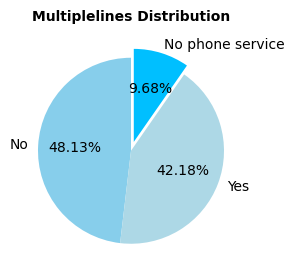

In [108]:
plt.figure(figsize=(3,4))
df_m = df['MultipleLines'].value_counts(dropna=False,normalize=True).reset_index()
plt.pie(df_m['proportion'],labels=df_m['MultipleLines'],autopct='%.2f%%',explode=[0.0,0.0,0.1],colors=['skyblue','lightblue','deepskyblue'],
       startangle=90)
plt.title('Multiplelines Distribution',pad=10,size=10,fontweight='bold')
plt.show()

#### 3.1.8 InternetService

In [110]:
df['InternetService'].value_counts(dropna=False)

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [112]:
df_i = df['InternetService'].value_counts(dropna=False,normalize=True).reset_index()
df_i

,InternetService,proportion
0,Fiber optic,0.439585
1,DSL,0.343746
2,No,0.216669


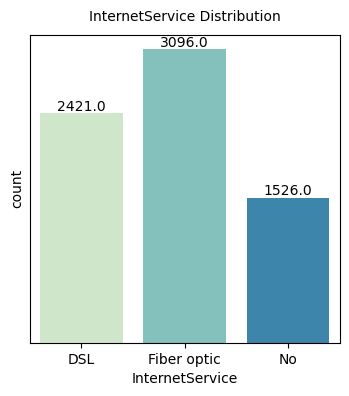

In [185]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x=df['InternetService'],data=df,palette='GnBu')
for i in ax.patches:
    ax.annotate(
        str(i.get_height()),
        (i.get_x()+i.get_width()/2,i.get_height()),
        ha = 'center',va='bottom'
    )

plt.title('InternetService Distribution',pad=10,size=10)
plt.yticks([])
plt.show()

#### 3.1.9 OnlineSecurity

In [128]:
df['OnlineSecurity'].value_counts(dropna=False)

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

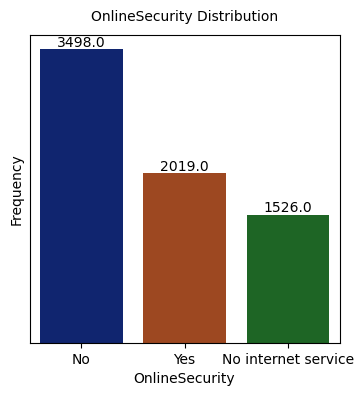

In [136]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x='OnlineSecurity',data=df,palette='dark')

for i in ax.patches:
    ax.annotate(
        str(i.get_height()),
        (i.get_x()+i.get_width()/2,i.get_height()),
        ha='center',va='bottom')


plt.yticks([])
plt.ylabel('Frequency')
plt.title('OnlineSecurity Distribution',pad=10,size=10)
plt.show()

#### 3.1.10 OnlineBackup

In [137]:
df['OnlineBackup'].value_counts(dropna=False)

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

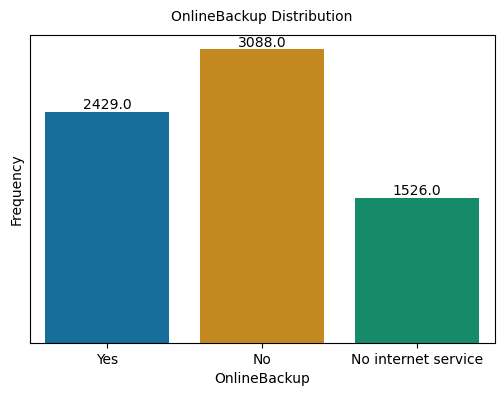

In [151]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = 'OnlineBackup',data=df,palette='colorblind',orient='y',)
for i in ax.patches:
    ax.annotate(
        str(i.get_height()),
        (i.get_x()+i.get_width()/2,i.get_height()),
        ha='center',va='bottom')

plt.title('OnlineBackup Distribution',size=10,pad=10)
plt.yticks([])
plt.ylabel('Frequency')
plt.show()

#### 3.1.11 DeviceProtection

In [152]:
df['DeviceProtection'].value_counts(dropna=False)

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

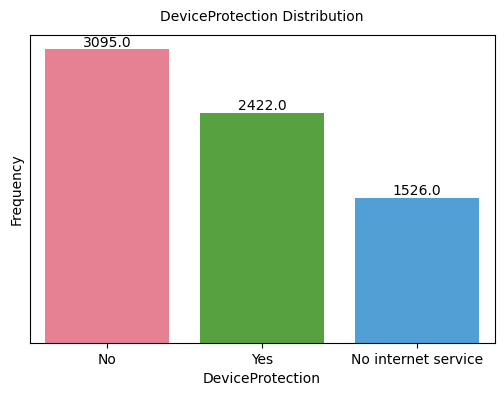

In [154]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x ='DeviceProtection',data=df,palette='husl')

for i in ax.patches:
    ax.annotate(
        str(i.get_height()),
        (i.get_x()+i.get_width()/2,i.get_height()),
         ha='center',va='bottom')

plt.title('DeviceProtection Distribution',pad=10,size=10)
plt.ylabel('Frequency')
plt.yticks([])
plt.show()

#### 3.1.12 TechSupport

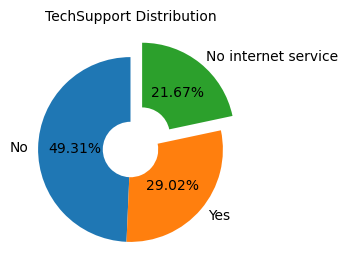

In [176]:
plt.figure(figsize=(3,3))
counts = df['TechSupport'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%.2f%%', wedgeprops={'width':0.7},explode=[0.0,0.0,0.2],startangle=90)
plt.title("TechSupport Distribution",pad=10,size=10)
plt.show()

#### 3.1.13 StreamingTV

In [177]:
df['StreamingTV'].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

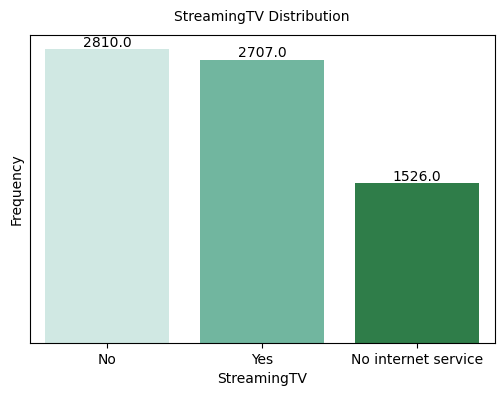

In [179]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='StreamingTV',data=df,palette='BuGn')

for i in ax.patches:
    ax.annotate(
        str(i.get_height()),
        (i.get_x()+i.get_width()/2,i.get_height()),
        ha='center',va='bottom')

plt.title('StreamingTV Distribution',pad=10,size=10)
plt.yticks([])
plt.ylabel('Frequency')
plt.show()

#### 3.1.13 StreamingMovies

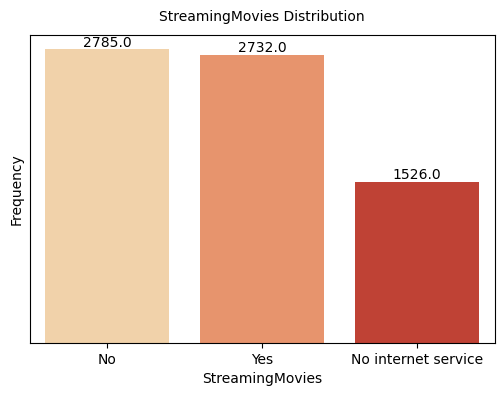

In [188]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = 'StreamingMovies',data=df,palette='OrRd')

for i in ax.patches:
    ax.annotate(
        str(i.get_height()),
        (i.get_x()+i.get_width()/2,i.get_height()),
        ha='center',va='bottom')

plt.title('StreamingMovies Distribution',pad=10,size=10)
plt.yticks([])
plt.ylabel('Frequency')
plt.show()

#### 3.1.13 Contract

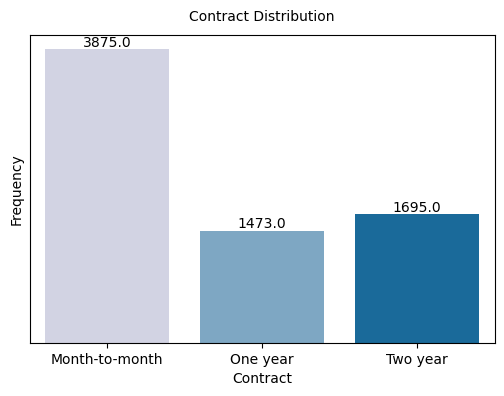

In [189]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = 'Contract',data=df,palette='PuBu')

for i in ax.patches:
    ax.annotate(
        str(i.get_height()),
        (i.get_x()+i.get_width()/2,i.get_height()),
        ha='center',va='bottom')

plt.title('Contract Distribution',pad=10,size=10)
plt.yticks([])
plt.ylabel('Frequency')
plt.show()

#### 3.1.14 PaperlessBilling

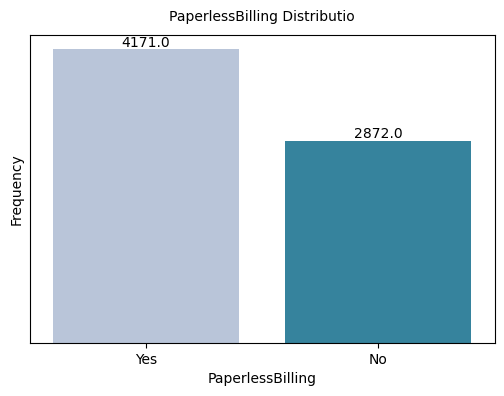

In [190]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = 'PaperlessBilling',data=df,palette='PuBuGn')

for i in ax.patches:
    ax.annotate(
        str(i.get_height()),
        (i.get_x()+i.get_width()/2,i.get_height()),
        ha='center',va='bottom')

plt.title('PaperlessBilling Distributio',pad=10,size=10)
plt.yticks([])
plt.ylabel('Frequency')
plt.show()

#### 3.1.15 PaymentMethod

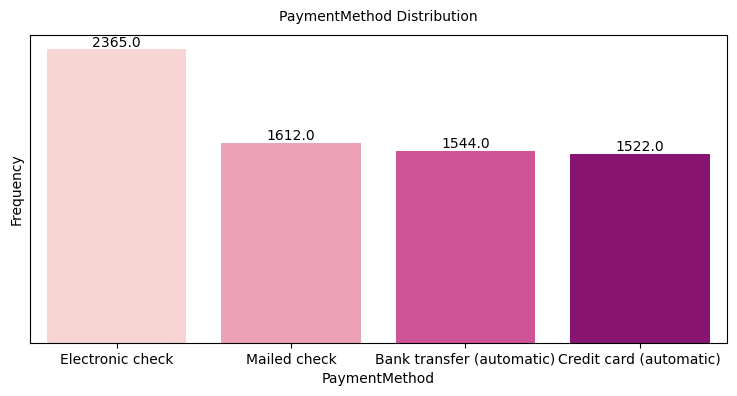

In [194]:
plt.figure(figsize=(9,4))
ax = sns.countplot(x = 'PaymentMethod',data=df,palette='RdPu')

for i in ax.patches:
    ax.annotate(
        str(i.get_height()),
        (i.get_x()+i.get_width()/2,i.get_height()),
        ha='center',va='bottom')

plt.title('PaymentMethod Distribution',pad=10,size=10)
plt.yticks([])
plt.ylabel('Frequency')
plt.show()

#### 3.1.16 Churn

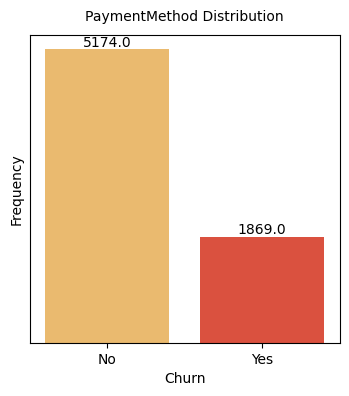

In [196]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = 'Churn',data=df,palette='YlOrRd')

for i in ax.patches:
    ax.annotate(
        str(i.get_height()),
        (i.get_x()+i.get_width()/2,i.get_height()),
        ha='center',va='bottom')

plt.title('PaymentMethod Distribution',pad=10,size=10)
plt.yticks([])
plt.ylabel('Frequency')
plt.show()

# 3.2 Numerical values

#### 3.2.1 tenure

In [201]:
print('Max Tenure in Months:',np.max(df['tenure']))

Max Tenure in Months: 72


In [202]:
print('Max Tenure in Months:',np.min(df['tenure']))

Max Tenure in Months: 0


#### It is not possible to have a tenure of zero. That is the region im dropped the tenure 0 columns 

In [204]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [206]:
df.describe()

,tenure,MonthlyCharges
count,7032.000000,7032.000000
mean,32.421786,64.798208
std,24.545260,30.085974
min,1.000000,18.250000
25%,9.000000,35.587500
50%,29.000000,70.350000
75%,55.000000,89.862500
max,72.000000,118.750000


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [210]:
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [214]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


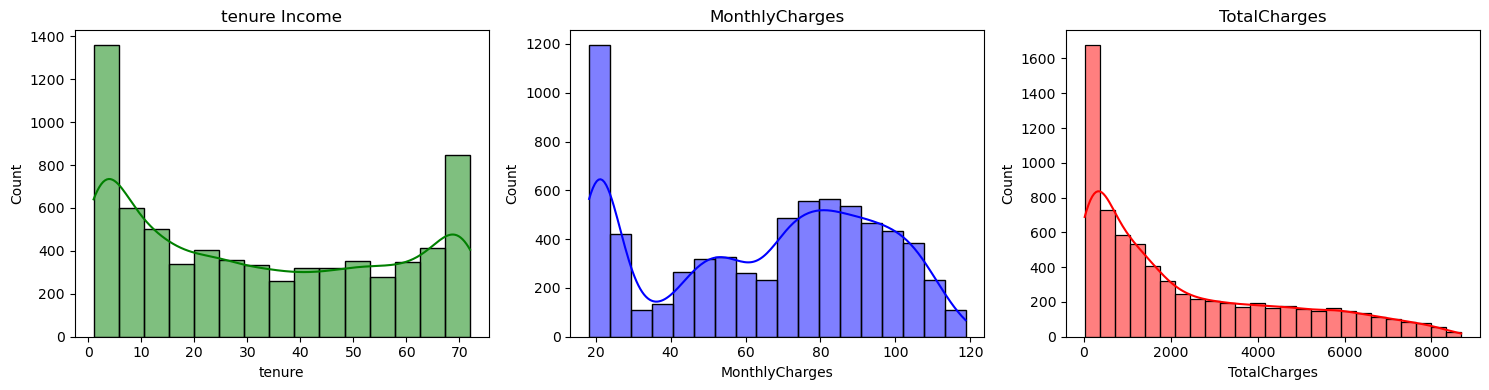

In [217]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

# Plot histograms
sns.histplot(data=df, x="tenure", kde=True, ax=ax[0], color='green')
ax[0].set_title("tenure Income")

sns.histplot(data=df, x="MonthlyCharges", kde=True, ax=ax[1], color='blue')
ax[1].set_title("MonthlyCharges")

sns.histplot(data=df, x="TotalCharges", kde=True, ax=ax[2], color='red')
ax[2].set_title("TotalCharges")

plt.tight_layout()
plt.show()

### 4 Categorical vs Categorical
#### 4.1 Gender vs Married

<Figure size 400x400 with 0 Axes>

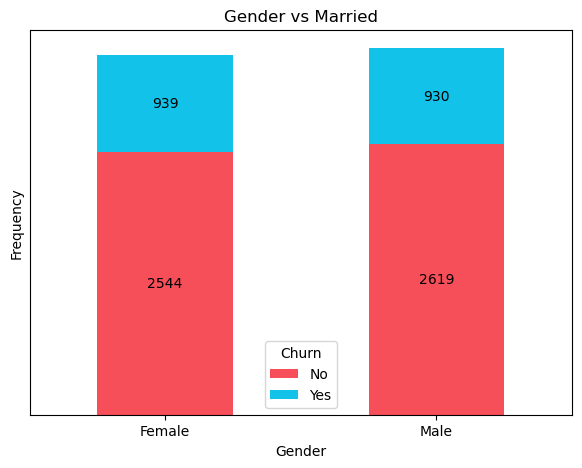

In [218]:
plt.figure(figsize=(4,4))
ct = pd.crosstab(df.gender, df.Churn)
ax = ct.plot(kind='bar', stacked=True, figsize=(7,5),color=['#f64f59','#12c2e9'])

plt.title('Gender vs Married')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

for bar in ax.patches:
    width = bar.get_width()
    height = bar.get_height()
    x = bar.get_x()
    y = bar.get_y()

    if height > 0:  # avoid labeling empty bars
        ax.text(x + width/2, y + height/2, str(int(height)),
                ha='center', va='center', color='black', fontsize=10)
plt.yticks([])
plt.show()

### 4.2 SeniorCitizen vs Chrun

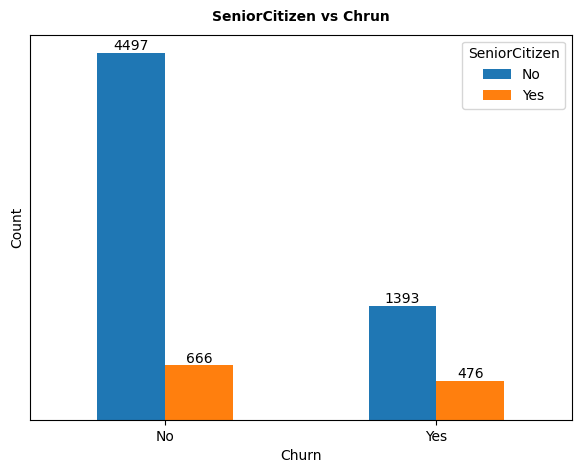

In [249]:
ct = pd.crosstab(df.Churn,df.SeniorCitizen)
ax = ct.plot(kind='bar', figsize=(7,5))

plt.title('SeniorCitizen vs Chrun', fontweight='bold',pad=10,size=10)
#plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=0)

# ✅ Add labels on each bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # avoid labeling empty bars
        ax.text(
            bar.get_x() + bar.get_width()/2,   # X position
            height,                            # Y position (top of bar)
            str(int(height)),                  # Text label
            ha='center', va='bottom', fontsize=10
        )
plt.yticks([])
plt.show()

### 4.3 Partner vs Chrun

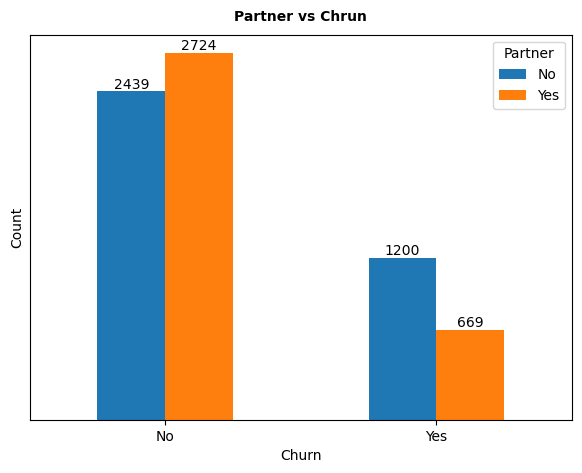

In [248]:
ct = pd.crosstab(df.Churn,df.Partner)
ax = ct.plot(kind='bar', figsize=(7,5))

plt.title('Partner vs Chrun', fontweight='bold',pad=10,size=10)
#plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=0)

# ✅ Add labels on each bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # avoid labeling empty bars
        ax.text(
            bar.get_x() + bar.get_width()/2,   # X position
            height,                            # Y position (top of bar)
            str(int(height)),                  # Text label
            ha='center', va='bottom', fontsize=10
        )
plt.yticks([])
plt.show()

### 4.4 Dependents vs Chrun

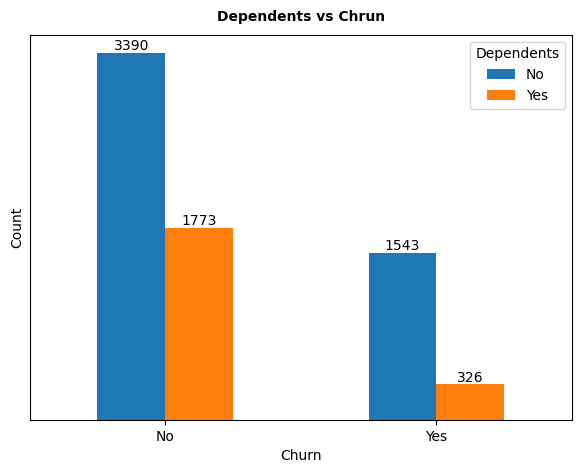

In [250]:
ct = pd.crosstab(df.Churn,df.Dependents)
ax = ct.plot(kind='bar', figsize=(7,5))

plt.title('Dependents vs Chrun', fontweight='bold',pad=10,size=10)
#plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=0)

# ✅ Add labels on each bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # avoid labeling empty bars
        ax.text(
            bar.get_x() + bar.get_width()/2,   # X position
            height,                            # Y position (top of bar)
            str(int(height)),                  # Text label
            ha='center', va='bottom', fontsize=10
        )
plt.yticks([])
plt.show()

### 4.4 PhoneService vs Chrun

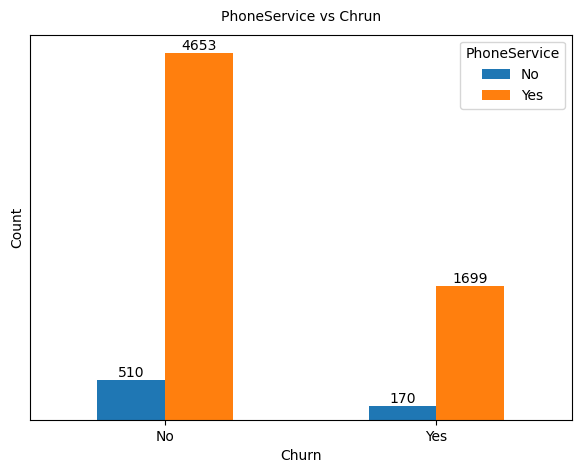

In [251]:
ct = pd.crosstab(df.Churn,df.PhoneService)
ax = ct.plot(kind='bar', figsize=(7,5))

plt.title('PhoneService vs Chrun',pad=10,size=10)
#plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=0)

# ✅ Add labels on each bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # avoid labeling empty bars
        ax.text(
            bar.get_x() + bar.get_width()/2,   # X position
            height,                            # Y position (top of bar)
            str(int(height)),                  # Text label
            ha='center', va='bottom', fontsize=10
        )
plt.yticks([])
plt.show()

### 4.5 MultipleLines vs Chrun

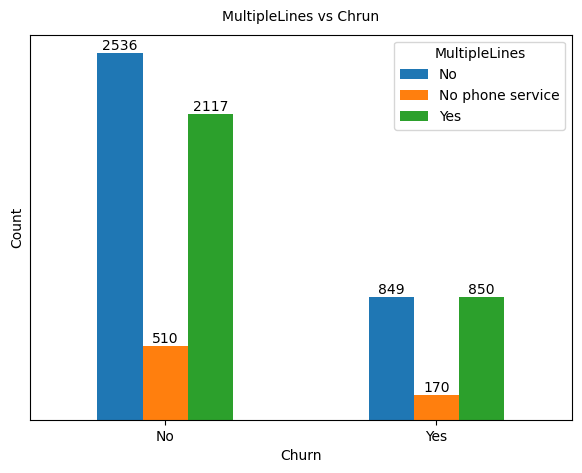

In [252]:
ct = pd.crosstab(df.Churn,df.MultipleLines)
ax = ct.plot(kind='bar', figsize=(7,5))

plt.title('MultipleLines vs Chrun',pad=10,size=10)
#plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=0)

# ✅ Add labels on each bar
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # avoid labeling empty bars
        ax.text(
            bar.get_x() + bar.get_width()/2,   # X position
            height,                            # Y position (top of bar)
            str(int(height)),                  # Text label
            ha='center', va='bottom', fontsize=10
        )
plt.yticks([])
plt.show()

### 4.6 InternetService vs Chrun

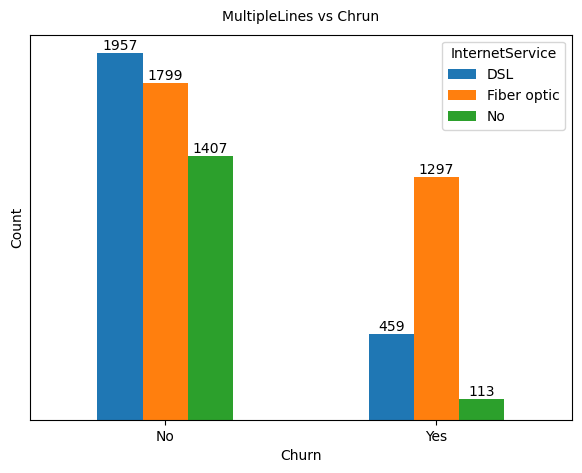

In [253]:
ct = pd.crosstab(df.Churn,df.InternetService)
ax = ct.plot(kind='bar', figsize=(7,5))

plt.title('MultipleLines vs Chrun',pad=10,size=10)
#plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=0)

for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # avoid labeling empty bars
        ax.text(
            bar.get_x() + bar.get_width()/2,   # X position
            height,                            # Y position (top of bar)
            str(int(height)),                  # Text label
            ha='center', va='bottom', fontsize=10
        )
plt.yticks([])
plt.show()

### 4.6 OnlineSecurity vs Chrun

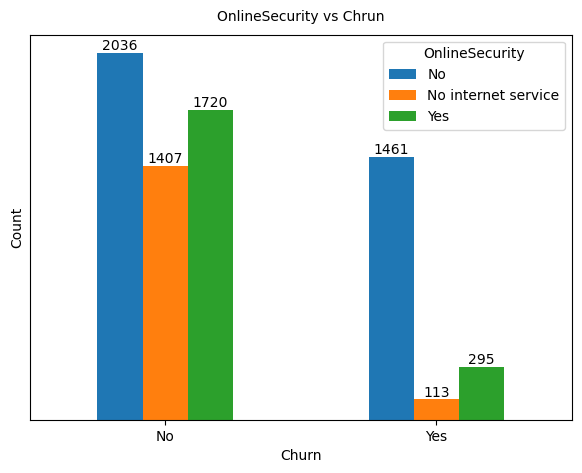

In [254]:
ct = pd.crosstab(df.Churn,df.OnlineSecurity)
ax = ct.plot(kind='bar', figsize=(7,5))

plt.title('OnlineSecurity vs Chrun',pad=10,size=10)
#plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=0)

for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # avoid labeling empty bars
        ax.text(
            bar.get_x() + bar.get_width()/2,   # X position
            height,                            # Y position (top of bar)
            str(int(height)),                  # Text label
            ha='center', va='bottom', fontsize=10
        )
plt.yticks([])
plt.show()

### 4.7 OnlineBackup vs Chrun

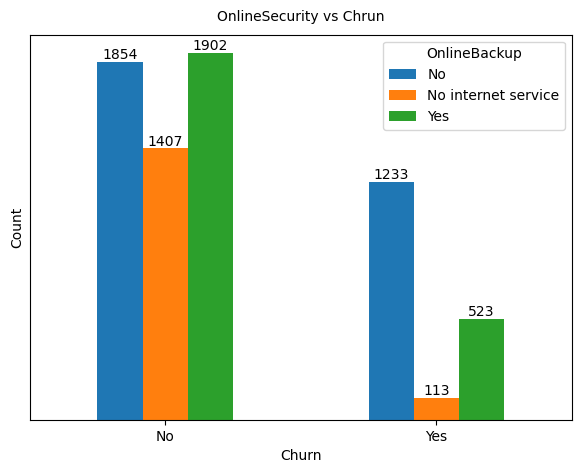

In [255]:
ct = pd.crosstab(df.Churn,df.OnlineBackup)
ax = ct.plot(kind='bar', figsize=(7,5))

plt.title('OnlineSecurity vs Chrun',pad=10,size=10)
#plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=0)

for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # avoid labeling empty bars
        ax.text(
            bar.get_x() + bar.get_width()/2,   # X position
            height,                            # Y position (top of bar)
            str(int(height)),                  # Text label
            ha='center', va='bottom', fontsize=10
        )
plt.yticks([])
plt.show()

### 4.8 DeviceProtection vs Chrun

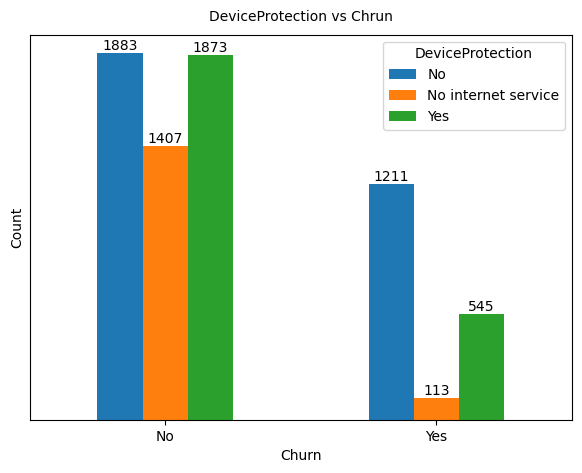

In [257]:
ct = pd.crosstab(df.Churn,df.DeviceProtection)
ax = ct.plot(kind='bar', figsize=(7,5))

plt.title('DeviceProtection vs Chrun',pad=10,size=10)
#plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=0)

for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # avoid labeling empty bars
        ax.text(
            bar.get_x() + bar.get_width()/2,   # X position
            height,                            # Y position (top of bar)
            str(int(height)),                  # Text label
            ha='center', va='bottom', fontsize=10
        )
plt.yticks([])
plt.show()

### 4.9 TechSupport vs Chrun

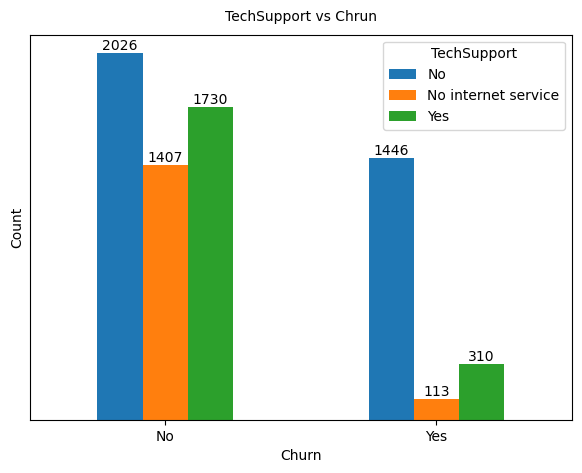

In [258]:
ct = pd.crosstab(df.Churn,df.TechSupport)
ax = ct.plot(kind='bar', figsize=(7,5))

plt.title('TechSupport vs Chrun',pad=10,size=10)
#plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=0)

for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # avoid labeling empty bars
        ax.text(
            bar.get_x() + bar.get_width()/2,   # X position
            height,                            # Y position (top of bar)
            str(int(height)),                  # Text label
            ha='center', va='bottom', fontsize=10
        )
plt.yticks([])
plt.show()

### 4.10 StreamingTV vs Chrun

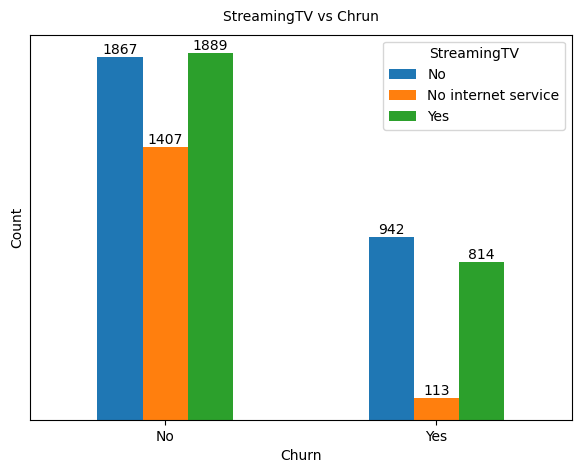

In [259]:
ct = pd.crosstab(df.Churn,df.StreamingTV)
ax = ct.plot(kind='bar', figsize=(7,5))

plt.title('StreamingTV vs Chrun',pad=10,size=10)
#plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=0)

for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # avoid labeling empty bars
        ax.text(
            bar.get_x() + bar.get_width()/2,   # X position
            height,                            # Y position (top of bar)
            str(int(height)),                  # Text label
            ha='center', va='bottom', fontsize=10
        )
plt.yticks([])
plt.show()

### 4.10 StreamingMovies vs Chrun

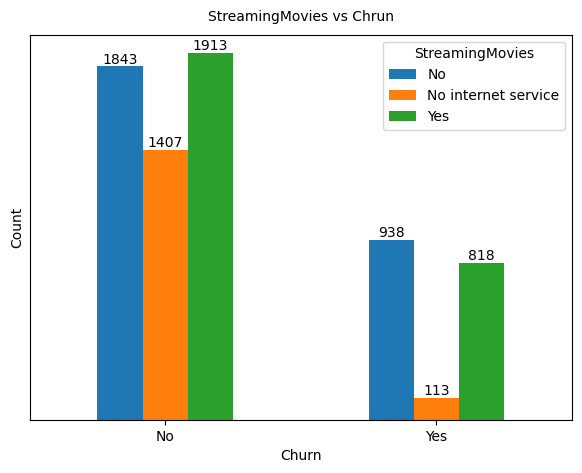

In [260]:
ct = pd.crosstab(df.Churn,df.StreamingMovies)
ax = ct.plot(kind='bar', figsize=(7,5))

plt.title('StreamingMovies vs Chrun',pad=10,size=10)
#plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=0)

for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # avoid labeling empty bars
        ax.text(
            bar.get_x() + bar.get_width()/2,   # X position
            height,                            # Y position (top of bar)
            str(int(height)),                  # Text label
            ha='center', va='bottom', fontsize=10
        )
plt.yticks([])
plt.show()

### 4.11 Contract vs Chrun

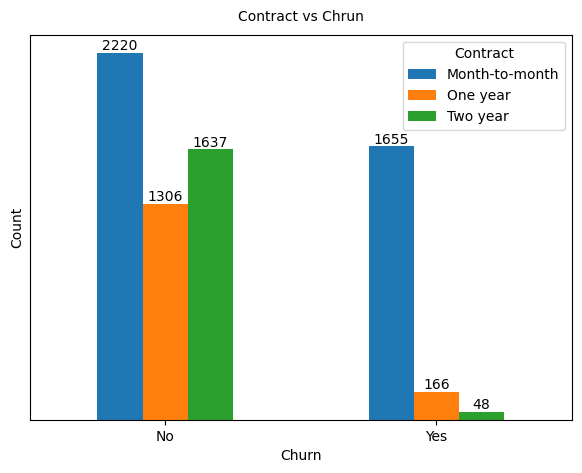

In [261]:
ct = pd.crosstab(df.Churn,df.Contract)
ax = ct.plot(kind='bar', figsize=(7,5))

plt.title('Contract vs Chrun',pad=10,size=10)
#plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=0)

for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # avoid labeling empty bars
        ax.text(
            bar.get_x() + bar.get_width()/2,   # X position
            height,                            # Y position (top of bar)
            str(int(height)),                  # Text label
            ha='center', va='bottom', fontsize=10
        )
plt.yticks([])
plt.show()

### 4.11 PaperlessBilling vs Chrun

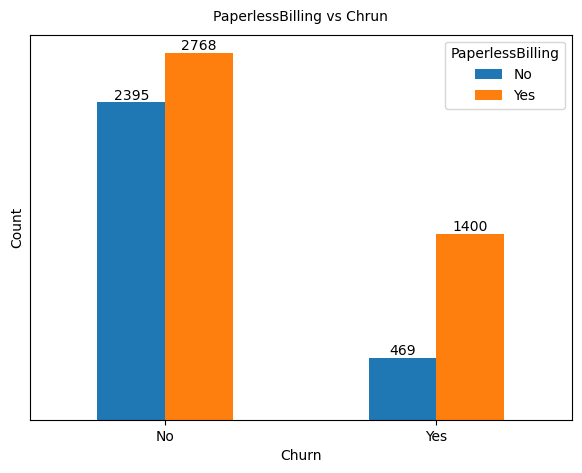

In [262]:
ct = pd.crosstab(df.Churn,df.PaperlessBilling)
ax = ct.plot(kind='bar', figsize=(7,5))

plt.title('PaperlessBilling vs Chrun',pad=10,size=10)
#plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=0)

for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # avoid labeling empty bars
        ax.text(
            bar.get_x() + bar.get_width()/2,   # X position
            height,                            # Y position (top of bar)
            str(int(height)),                  # Text label
            ha='center', va='bottom', fontsize=10
        )
plt.yticks([])
plt.show()

### 4.12 PaymentMethod vs Chrun

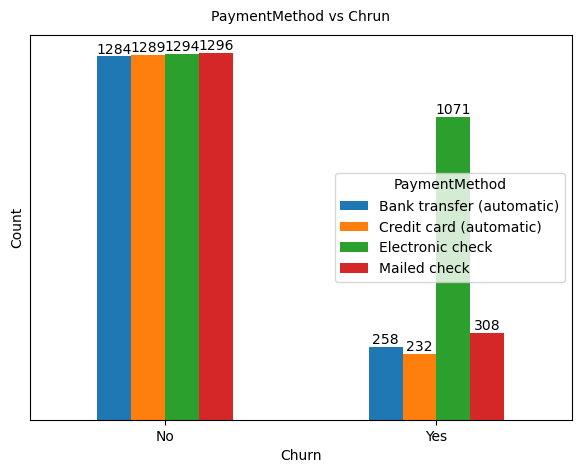

In [263]:
ct = pd.crosstab(df.Churn,df.PaymentMethod)
ax = ct.plot(kind='bar', figsize=(7,5))

plt.title('PaymentMethod vs Chrun',pad=10,size=10)
#plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.xticks(rotation=0)

for bar in ax.patches:
    height = bar.get_height()
    if height > 0:  # avoid labeling empty bars
        ax.text(
            bar.get_x() + bar.get_width()/2,   # X position
            height,                            # Y position (top of bar)
            str(int(height)),                  # Text label
            ha='center', va='bottom', fontsize=10
        )
plt.yticks([])
plt.show()

### 4.13 Distribution of monthly charges by churn

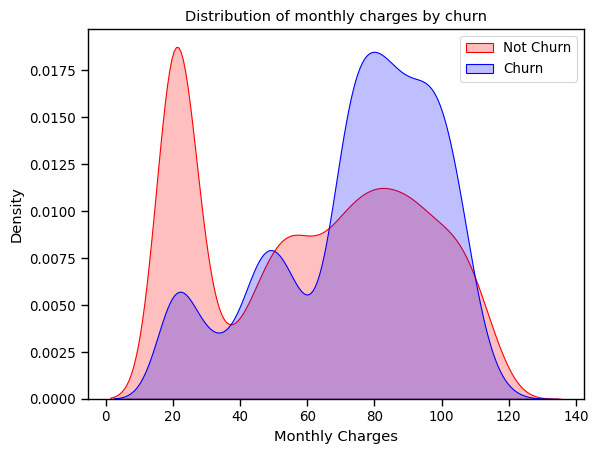

In [264]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

### 4.14 Distribution of total charges by churn

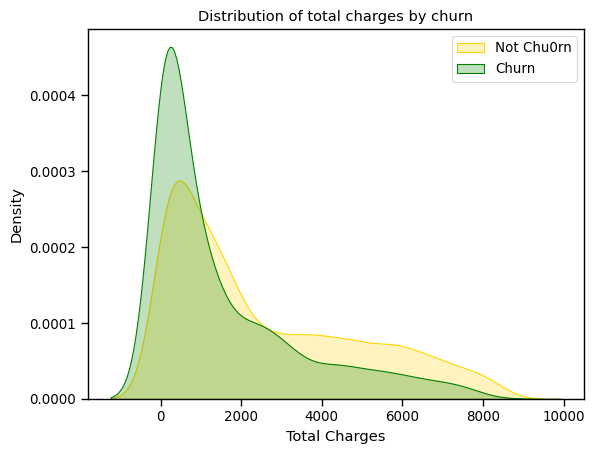

In [265]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

# 5.Data Preprocessing

In [297]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [298]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [299]:
df['TotalCharges'] = df['TotalCharges'].astype('float64')

### drop the unwanted columns 

In [300]:
df.drop(columns=['customerID'],inplace=True)

### Encoding

In [301]:
df = pd.get_dummies(df, drop_first=True)
df = df.astype('int')

### Creating Dependent and Independent Variables 

In [291]:
X = df.drop(columns='Churn_Yes', axis=1)
y = df['Churn_Yes']

### SMOTE Technique

In previous exploration, it can be seen that the number between approved and rejected loan is imbalanced. In this section, oversampling technique will be used to avoid overfitting,

In [303]:
X, y = SMOTE().fit_resample(X, y)

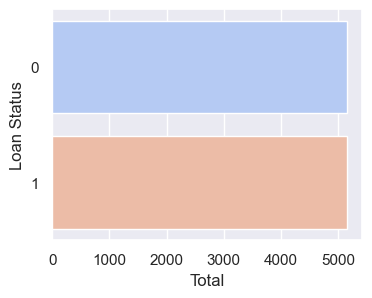

In [304]:
plt.figure(figsize=(4,3))
sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=df, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

### Splitting data

In [305]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.3)

### Scaling data 

In [311]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Features Selection

In [339]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_

rf_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

rf_df

,Feature,Importance
3,TotalCharges,0.145851
1,tenure,0.142196
2,MonthlyCharges,0.106652
13,OnlineSecurity_Yes,0.062697
25,Contract_Two year,0.061405
19,TechSupport_Yes,0.053042
24,Contract_One year,0.044592
6,Dependents_Yes,0.028944
15,OnlineBackup_Yes,0.026630
10,InternetService_Fiber optic,0.026080


In [340]:
top_features = rf_df['Feature'].head(10).values
print("Selected Top Features:", top_features)

# Create final X
X_selected = X[top_features]

Selected Top Features: ['TotalCharges' 'tenure' 'MonthlyCharges' 'OnlineSecurity_Yes'
 'Contract_Two year' 'TechSupport_Yes' 'Contract_One year'
 'Dependents_Yes' 'OnlineBackup_Yes' 'InternetService_Fiber optic']


### After selecting the top features, again split the data.

In [365]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=0)

# LogisticRegression

In [366]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Train Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Train Score: 0.7991145545102379
Test Score: 0.8102001291155584


In [367]:
y_pred = model.predict(X_test)

In [368]:
accuracy_score(y_pred,y_test)

0.8102001291155584

In [369]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80      1330
           1       0.88      0.77      0.82      1768

    accuracy                           0.81      3098
   macro avg       0.81      0.82      0.81      3098
weighted avg       0.82      0.81      0.81      3098



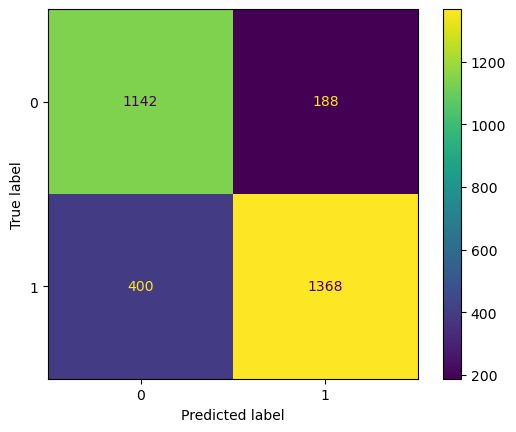

In [370]:
ConfusionMatrixDisplay.from_predictions(y_pred,y_test)
plt.show()

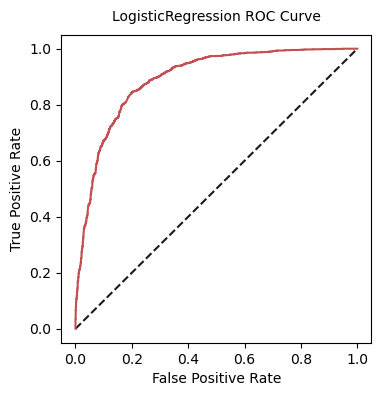

In [378]:
plt.figure(figsize=(4,4))
y_lg_pred_prob = model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_lg_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression ROC Curve',fontsize=10,pad=10,size=10)
plt.show();

## KNN

In [393]:
knn_model = KNeighborsClassifier() 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7640413169786959


In [394]:
print("Train Score:", knn_model.score(X_train, y_train))
print("Test Score:", knn_model.score(X_test, y_test))

Train Score: 0.8180686220254566
Test Score: 0.7640413169786959


In [395]:
y_pred = knn_model.predict(X_test)

In [396]:
accuracy_score(y_pred,y_test)

0.7640413169786959

In [397]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      1347
           1       0.83      0.74      0.78      1751

    accuracy                           0.76      3098
   macro avg       0.76      0.77      0.76      3098
weighted avg       0.77      0.76      0.77      3098



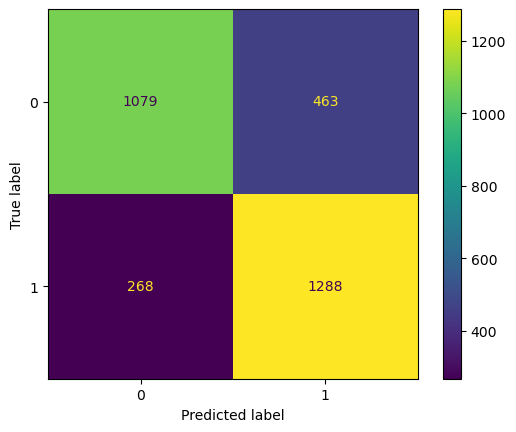

In [398]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

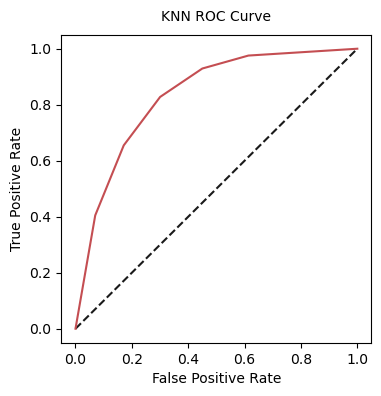

In [399]:
plt.figure(figsize=(4,4))
y_log_knn_prob = knn_model.predict_proba(X_test)[:,1]
fpr_knn,tpr_knn,thersholds = roc_curve(y_test,y_log_knn_prob )
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_knn,tpr_knn,label='KNN',color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve',fontsize=10,pad=10,size=10)
plt.show()

# RandomForestClassifier

In [400]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [401]:
print('Train Score:',model_rf.score(X_train,y_train))
print('Test Score:',model_rf.score(X_test,y_test))

Train Score: 0.9798007747648035
Test Score: 0.828921885087153


In [402]:
y_pred = model_rf.predict(X_test)

In [403]:
accuracy_score(y_pred,y_test)

0.828921885087153

In [404]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      1458
           1       0.86      0.81      0.83      1640

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098



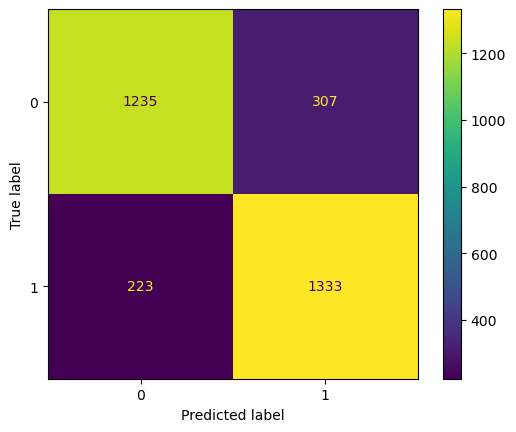

In [405]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.show()

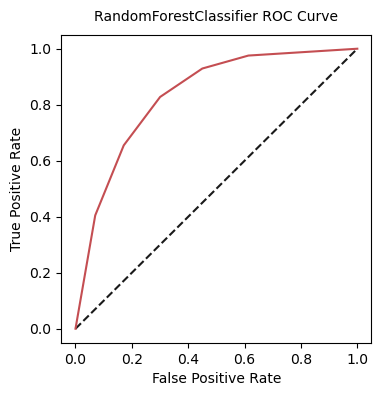

In [406]:
plt.figure(figsize=(4,4))
proba_rf = model_rf.predict_proba(X_test)[:,1]
fpr_rf,tpr_rf,thersold = roc_curve(y_test,proba_rf)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_knn,tpr_knn,label='RF',color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier ROC Curve',fontsize=10,pad=10,size=10)
plt.show()

# Decision Tree Classifier

In [415]:
model_dt = DecisionTreeClassifier(criterion='entropy',min_samples_split=100)
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=100)

In [416]:
print("The Train Score:",model_dt.score(X_train,y_train))
print("The Test Score:",model_dt.score(X_test,y_test))

The Train Score: 0.8263696734919757
The Test Score: 0.8185926404131698


In [417]:
y_pred_dt = model_dt.predict(X_test)

In [418]:
accuracy_score(y_test,y_pred_dt)

0.8185926404131698

In [419]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1542
           1       0.80      0.85      0.83      1556

    accuracy                           0.82      3098
   macro avg       0.82      0.82      0.82      3098
weighted avg       0.82      0.82      0.82      3098



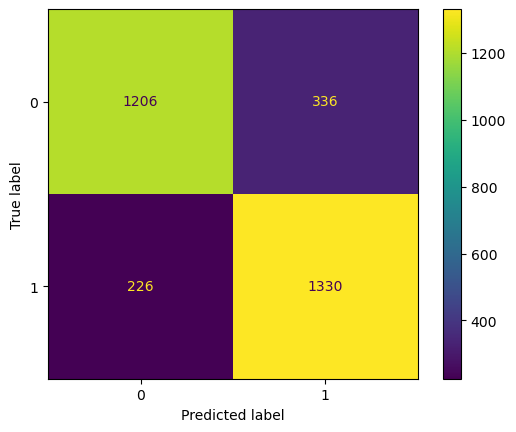

In [420]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt)
plt.show()

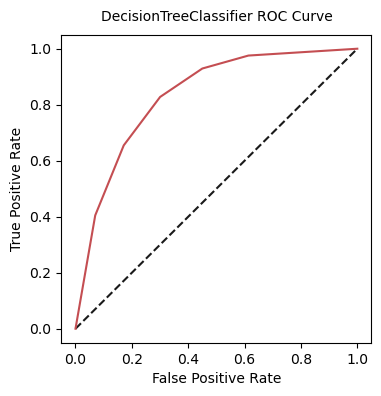

In [431]:
plt.figure(figsize=(4,4))
proba_rf = model_dt.predict_proba(X_test)[:,1]
fpr_rf,tpr_rf,thersold = roc_curve(y_test,proba_rf)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_knn,tpr_knn,label='RF',color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DecisionTreeClassifier ROC Curve',fontsize=10,pad=10,size=10)
plt.show()

# SVM

In [454]:
svc = SVC(kernel='rbf', probability=True, max_iter=1000)
svc.fit(X_train, y_train)

SVC(max_iter=1000, probability=True)

In [455]:
print('The Train Score:',svc.score(X_train,y_train))
print('The Test Score:',svc.score(X_test,y_test))

The Train Score: 0.5820420586607638
The Test Score: 0.591994835377663


In [456]:
y_pred_sv = svc.predict(X_test)

In [457]:
accuracy_score(y_pred_sv,y_test)

0.591994835377663

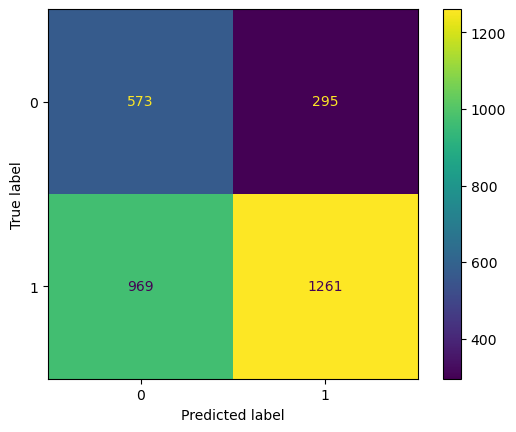

In [458]:
ConfusionMatrixDisplay.from_predictions(y_pred_sv,y_test)
plt.show()

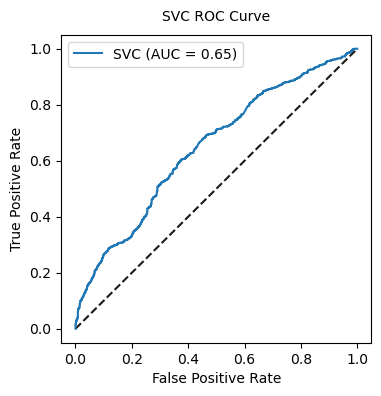

In [459]:

plt.figure(figsize=(4,4))
proba_svc = svc.predict_proba(X_test)[:, 1]
fpr_svc, tpr_svc, threshold = roc_curve(y_test, proba_svc)
auc_svc = auc(fpr_svc, tpr_svc)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_svc, tpr_svc, label=f'SVC (AUC = {auc_svc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVC ROC Curve', fontsize=10, pad=10)
plt.legend()
plt.show()

## Naive Bayes

accuracy_score: 0.7989025177533893
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      1542
           1       0.76      0.88      0.82      1556

    accuracy                           0.80      3098
   macro avg       0.81      0.80      0.80      3098
weighted avg       0.81      0.80      0.80      3098



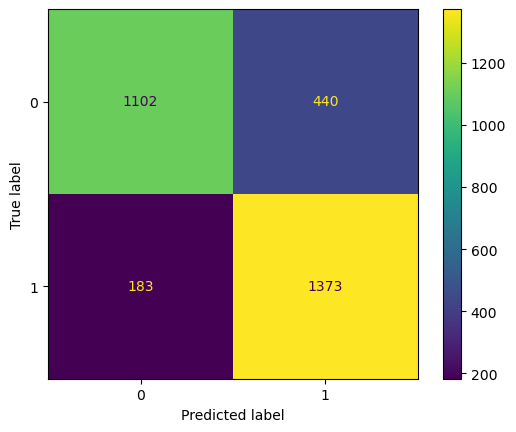

In [437]:
NB = GaussianNB()
NB.fit(X_train,y_train)

y_pred_NB = NB.predict(X_test)

print('accuracy_score:',accuracy_score(y_test,y_pred_NB))
print(classification_report(y_test,y_pred_NB))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_NB)
plt.show()

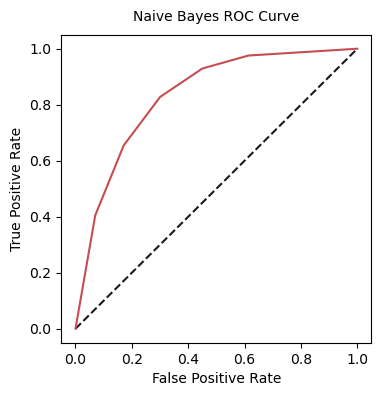

In [439]:
plt.figure(figsize=(4,4))
proba_rf = NB.predict_proba(X_test)[:,1]
fpr_rf,tpr_rf,thersold = roc_curve(y_test,proba_rf)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_knn,tpr_knn,label='RF',color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes ROC Curve',fontsize=10,pad=10,size=10)
plt.show()

# XGBClassifier

Test Accuracy - XGBoost: 0.8231116849580374
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      1542
           1       0.81      0.85      0.83      1556

    accuracy                           0.82      3098
   macro avg       0.82      0.82      0.82      3098
weighted avg       0.82      0.82      0.82      3098



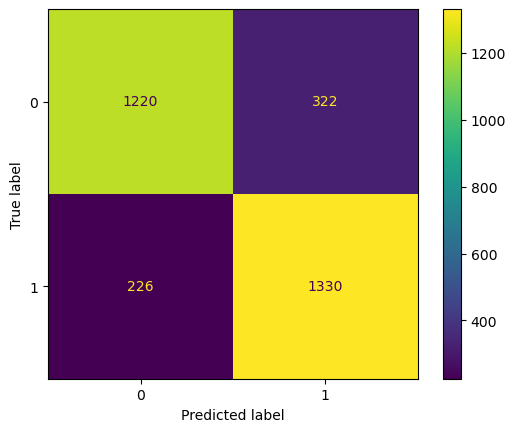

In [440]:
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False,learning_rate=1,max_depth=7, n_estimators=200,booster='gbtree')
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
print("Test Accuracy - XGBoost:", accuracy_score(y_test, y_pred_xgb))

print(classification_report(y_test,y_pred_xgb))

ConfusionMatrixDisplay.from_predictions(y_test,y_pred_xgb)
plt.show()

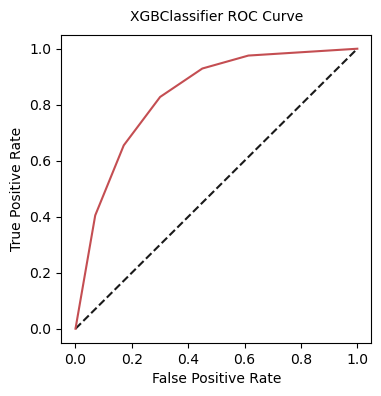

In [441]:
plt.figure(figsize=(4,4))
proba_rf = xgb.predict_proba(X_test)[:,1]
fpr_rf,tpr_rf,thersold = roc_curve(y_test,proba_rf)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_knn,tpr_knn,label='RF',color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBClassifier ROC Curve',fontsize=10,pad=10,size=10)
plt.show()

# LGBMClassifier

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3607, number of negative: 3621
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 443
[LightGBM] [Info] Number of data points in the train set: 7228, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499032 -> initscore=-0.003874
[LightGBM] [Info] Start training from score -0.003874
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
accuracy_score: 0.8340865074241446
              precision    recall  f1-score   support

           0       0.79      0.86      0.83      14

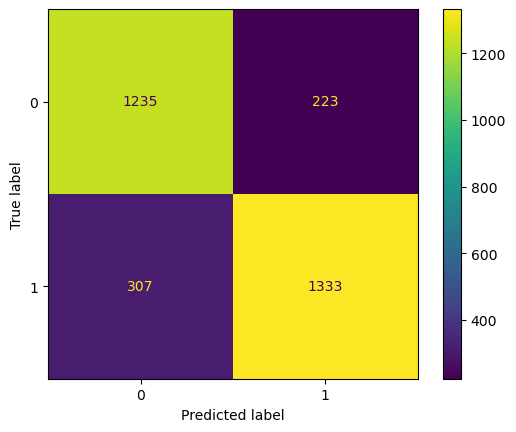

In [442]:
lgb = LGBMClassifier(colsample_bytree = 1.0, learning_rate =  0.1, max_depth = 9, n_estimators = 200, subsample = 0.7)
lgb.fit(X_train,y_train)

y_pred_lgb = lgb.predict(X_test)

print('accuracy_score:',accuracy_score(y_test,y_pred_lgb))

print(classification_report(y_pred_lgb,y_test))

ConfusionMatrixDisplay.from_predictions(y_pred,y_test)
plt.show()

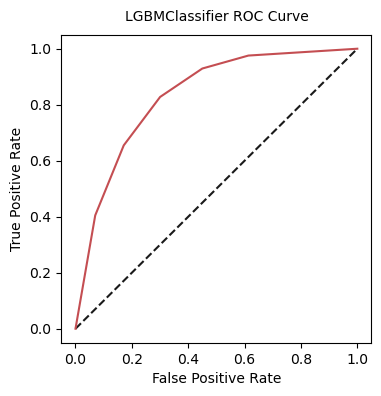

In [460]:
plt.figure(figsize=(4,4))
proba_rf = lgb.predict_proba(X_test)[:,1]
fpr_rf,tpr_rf,thersold = roc_curve(y_test,proba_rf)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_knn,tpr_knn,label='RF',color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LGBMClassifier ROC Curve',fontsize=10,pad=10,size=10)
plt.show()

# Ranking Table

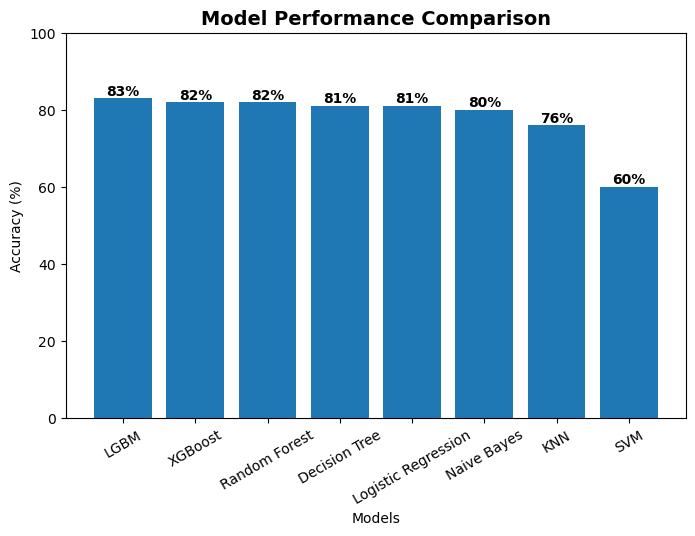

In [462]:
# Model scores
models = ['LGBM', 'XGBoost', 'Random Forest', 'Decision Tree', 'Logistic Regression', 'Naive Bayes', 'KNN', 'SVM']
scores = [83, 82, 82, 81, 81, 80, 76, 60]
# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(models, scores)
# Add labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height)+'%', ha='center', va='bottom', fontsize=10, fontweight='bold')
# Chart formatting
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)
plt.xticks(rotation=30)
plt.show()

# Conclusion

- After evaluating multiple machine learning models for customer churn prediction, the results clearly show that tree-based ensemble models outperform traditional classifiers. Among all models, the LGBM Classifier delivered the highest accuracy of 83%, closely followed by XGBoost and Random Forest with 82% each. These models are better at capturing complex, non-linear relationships in the data, which is common in churn behavior.

- Models such as Logistic Regression, Naive Bayes, and Decision Tree performed moderately well, indicating that there are still noticeable linear patterns in the data. However, KNN and SVM showed significantly lower performance, making them less suitable choices for this dataset without heavy tuning.

- Overall, based on accuracy and model stability, LGBM is recommended as the final model for deployment. It provides the best balance of performance, speed, and generalization.

# PREDICT NEW CUSTOMER

In [469]:
new_customer = {
    'TotalCharges': 350,
    'tenure': 12,
    'MonthlyCharges': 650.7,
    'OnlineSecurity_Yes': 0,
    'Contract_Two year': 0,
    'TechSupport_Yes': 1,
    'Contract_One year': 1,
    'Dependents_Yes': 0,
    'OnlineBackup_Yes': 1,
    'InternetService_Fiber optic': 1
}


new_data = pd.DataFrame([new_customer])

prediction = lgb.predict(new_data)[0]
probability = lgb.predict_proba(new_data)[:, 1][0]

if prediction == 1:
    print("Result: Customer WILL Churn")
else:
    print("Result: Customer will NOT Churn")

print("Churn Probability:", round(probability, 2))

Result: Customer WILL Churn
Churn Probability: 0.75
